<div style="text-align: center;">
  <h1>AMES HOUSING PRICE DATA</h1>
</div>

                           Data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010.

----

### Requirement Understanding (Problem Statement/Assessment)
Question arises from the historic **HOUSING PRICE** data is *"what will be forecasted/predicted Sale Price of a house in Ames, Iowa?"*


### Analytic Approach (How can I use the data to answer the question?)
This type of problem statement requires the use of **PREDICTIVE ANALYSIS** in *DATA SCIENCE*

### Technique (What kind of techniques are included in the selected approach?)
* Regression Analysis - Predicting outcomes based on relationships between independent and dependent variables/features.
* Machine Learning Models - Using algorithms to predict future outcomes based on historical data.

### Data Requirements and Step-by-Step Approach
* A historical data set comprises of various features/variable/columns that includes the factor responsible for every house sold in the area. For example, land type, area(in sqft), house qualification, neigborhood, sales type or condition, etc.
* Based on the information provided related to the dataset, following steps are going to be taken (I have divided all steps into two main categories)

##### Data Preprocessing (Category 1)
1. Data Extraction/Collection and Loading
2. Data Understanding and Cleaning (Dealing with outliers and missing values)
3. Data Modification -- Feature Engineering ("One Hot" Encoding over Categorical Data/Features)

##### Data Modeling (Category 2)
1. Data Segregation (Into dependent and independent variables)
2. Data Splitting and Scaling (Preparing Train | Test split and normalizing the data set)
3. Data Modeling and Evaluating (Fitting the model with training data and evaluating the performance based on test data)
4. Retraining model(Based on performance metrics, changing hyperparameters, adjusting models or switching to different algorithms for least errors)

----

***I hope above summary gives you the brief understanding of complete program/analysis and you can resonate with the project outcomes very well. Let's move to the execution part as follows***

### STEP 1: DATA EXTRACTION AND LOADING

To start with the data analysis, we'll require to import certain **libraries** from python useful for data cleaning, exploration and visualization.
In the first step, I am importing **numpy/pandas** for data extraction and loading, **matplotlib** and **seaborn** for data visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using the ***read_csv*** function from Pandas library, I am going to import the CSV file into dataframe object (table like structure with rows/columns)

In [5]:
Ames_data = pd.read_csv("Ames_Housing_Data.csv")

In [6]:
#encountering first five rows of dataframe
Ames_data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Displaying column level description and termnologies used
with open("Ames_Housing_Feature_Description.txt",'r') as ref:
    print(ref.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [8]:
#Checking relative information about the dataframe
Ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### STEP 2: DATA UNDERSTANDING/DATA CLEANING

There are several steps, methods/techniques or ways to refine our dataset so that it can be well-optimized for our ML model. The key objectives for this step is as follows:

* Data can be misleading sometimes, there are some values that doesn't represent the actual pattern or trend followed by the majority of data points. We need to find those few data points and remove it before pursuing for data modeling. (Concept of judging and removing ***outliers***)
* Ensure accuracy, completeness, consistency, and validity. Dataset might contain invalid, missing or duplicated data that sometimes degrade the quality of dataset. This step works on producing the ***improved quality data***, even better for visualization and analysis.
* Improved Quality data leads to the goals below:
  * Building reliable and accurate models
  * Extracting meaningful insights from data
  * Deliver data that aligns with specific business needs and objectives.

**2.1** : Dealing with Outliers

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Even if a data point is an outlier, its still a data point! We have to carefully consider the data, its sources, and your goals whenever deciding to remove an outlier. Each case is different!

Goals/Objective

* Understand different mathmatical definitions of outliers
* Use of Python tools to recognize outliers and remove them

According to this dataset, the first step is to find the correlation of 'SalePrice' with all other features/columns present in the dataset. This will help us to compare the 'SalePrice' with best correlated feature to understand the pattern/trend followed by the dataset.

In [15]:
#finding positively/negatively correlated columns
Ames_data.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

What is ***correlation***?

In simpler language, defining the relationship of two features within a defined range [-1,1] where the negative side indicates inversely proportion growth of one feature based on another and positive side indicates the directly proportion growth/impact on other feature. More positive means feature highly contribute in increase of 'SalePrice' and vice-versa

**Observation**

* Focusing on target column 'SalePrice', most of the features are positively correlated with the same.
* Top 5 columns that contributes the most are
     * Overall Qual :      0.79
     * Gr Liv Area  :      0.70
     * Garage Cars  :      0.64
     * Garage Area   :     0.64
     * Total Bsmt SF  :    0.63
* Seems to be that the column **'Overall Qual'** could be a best candidate to find the suitable trend/pattern of dataset.

In [17]:
#Descriptive summary of SalePrice column
Ames_data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

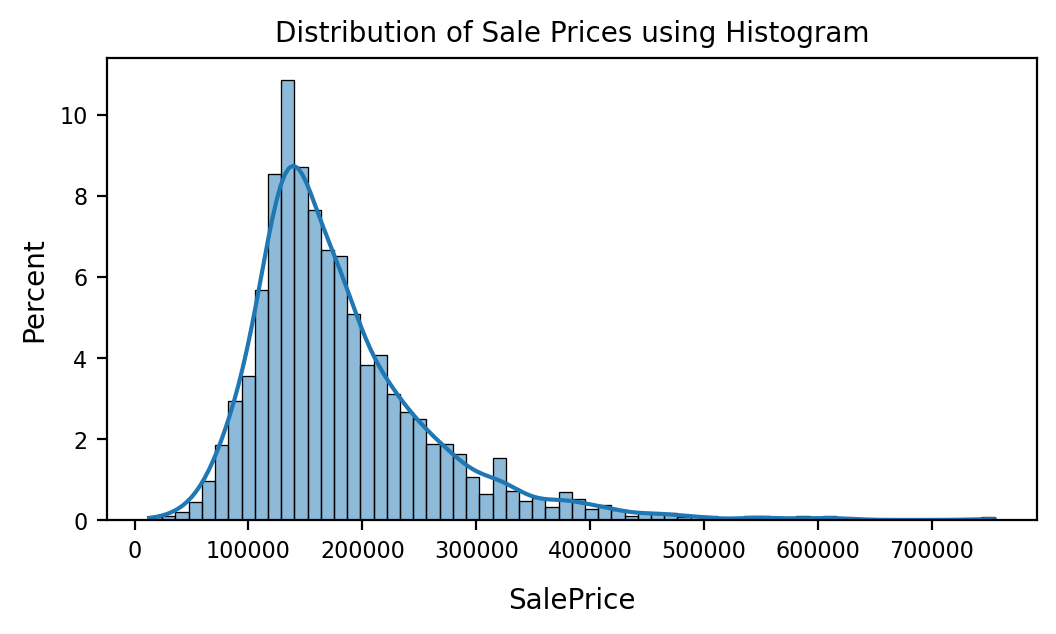

In [18]:
#Visualizing the distribution of SalePrice using Seaborn and Matplotlib
plt.figure(figsize=(6,3), dpi = 200)

#Using Histogram for data distribution
sns.histplot(x = Ames_data['SalePrice'], kde=True, stat = 'percent')
plt.title('Distribution of Sale Prices using Histogram', size = 10)

#adjusting tick sizes
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('SalePrice', labelpad=8.5)
plt.show()

Parameters 'KDE' and 'Percent' is used to display the distribution of **Sale Prices** ranges from 12.7k to 755k (in dollars) where percent showing the domination of values w.r.t to the overall dataset of SalePrice.

**Observation**

* Right Skewed Distributed data points
* Most of the dataset consist within a range of 75k to 275k prices
* We can say that above $400k are the values that doesn't resonates completely with the trend. Although, we can't judge whether they are completely out or can give a valuable insights further while training the model.

Let's confirm alternatively through **boxplot**

Box plots clearly highlight potential outliers, which are data points that fall significantly outside the main body of the data. This can help you identify unusual observations that may require further investigation.

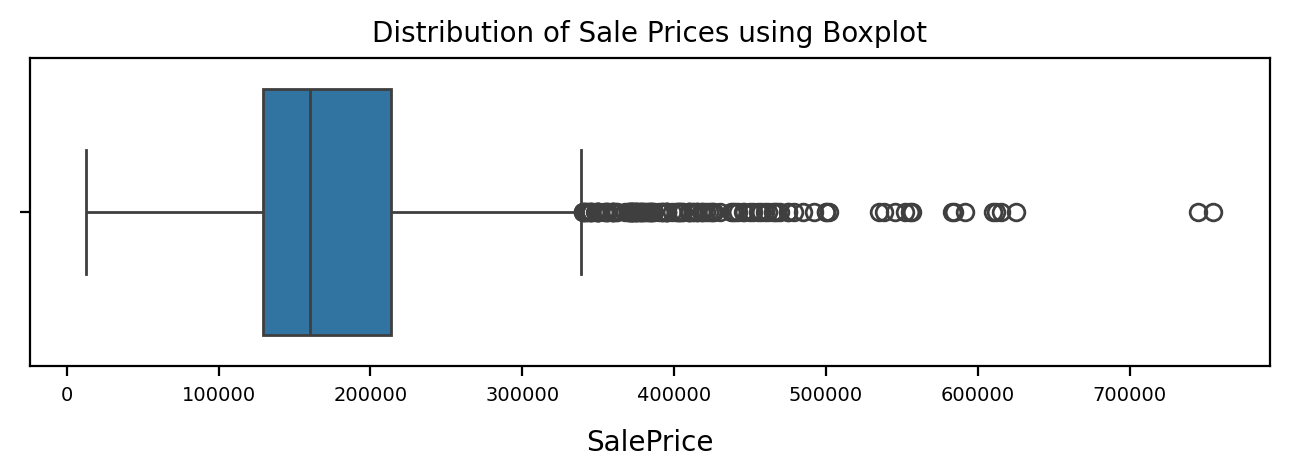

In [20]:
plt.figure(figsize=(8,2), dpi = 200)
sns.boxplot(Ames_data['SalePrice'], orient='h')
plt.title('Distribution of Sale Prices using Boxplot', size = 10)

#adjusting tick sizes
plt.xticks(size = 7)
plt.xlabel('SalePrice', labelpad=8.5)
plt.show()

The above boxplot shows the similar considerations that has been described through histogram. What does the boxplot represents?

* InterQuantile Range(IQR) that is shown through the above blue box and it signifies data points covered between 25th percentile and 75th percentile values.
* Whiskers, generally the lines extended through the blue box describes the range extended based on 1.5*IQR Range
* Circles/points outside whiskers that are generally defined as Outliers (Yet it is not confirmed outlier as we have just got indication and further need to work on it)

Here, IQR = 84000 and upper limit would be 213500 + (1.5 * 84000) = 3,39,500
* Range covered by whiskers = 1.5 * IQR
* 75th percentile value = 213500

As discussed earlier, above $400k seems to be some of the data points that are out of the trend. Also, the upper limit in boxplot is 3,39,500 ~ 400k with 1.5 * IQR. Since, we can't say that 1.5*IQR is the good range or not as this is a default value. Maybe increasing the multiplier may give different upper limits as well.

**NOTE**: We can assume the two datapoints outside 700k mark as a strong evidence of outliers (they are quite far away from the other data points or respective outliers)

To remove this uncertainity, let's move ahead with some more visualizations with our strongly correlated columns so that we can find some more evidence

##### Descriptive summary of our most related column
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [25]:
#combining the most qualified column with SalePrice
Ames_data[['SalePrice', 'Overall Qual']].head()

,SalePrice,Overall Qual
0,215000,6
1,105000,5
2,172000,6
3,244000,7
4,189900,5


SalePrice, Overall Qual -- Both columns are continuous features that describes ordinal data. These type of columns are well-suited for **scatterplot** to observe the data trend(linear, non-linear), majority of cluster of data and values that are outside the cluster or not following the trend well.

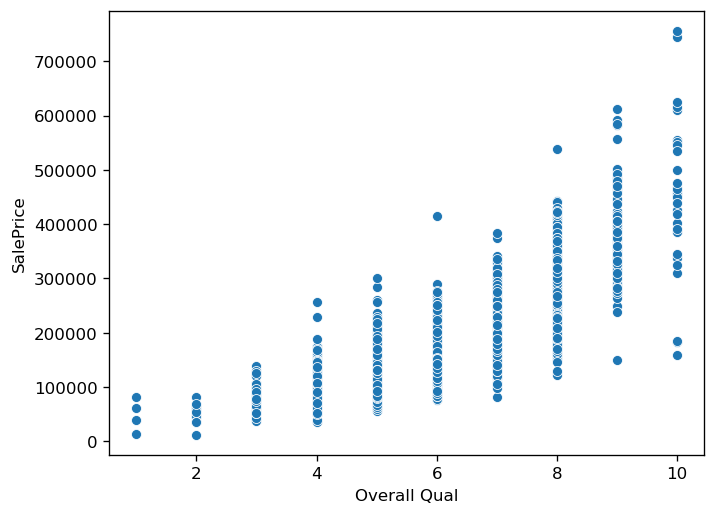

In [27]:
plt.figure(dpi=120)
sns.scatterplot(y = 'SalePrice', x = 'Overall Qual', data = Ames_data);

**Observation**
* It is clear that when the Overall Quality Rating (from 1 to 10) increases, the Sale Price of the house must be higher. So, we can say that points that are not following this trend must be an outlier and will give problems further in developing an optimized model.
* Consider three points here that are below $200k value but have excellent overal rating of 9 or 10. It means that this misleads the overall trend of being *"highly qualified house having more price"*
* Let's check these values as follows:

In [29]:
Ames_data[(Ames_data['Overall Qual'] > 8) & (Ames_data['SalePrice'] < 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


The above are those 4 records that seems to be misleading based on Overall Qual. To cross check, let's use the other most correlated columns as well.

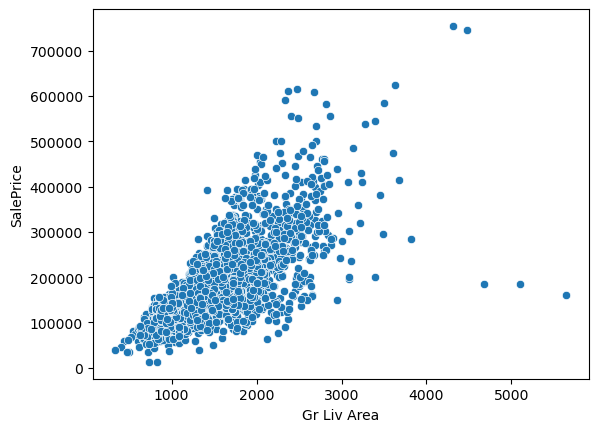

In [31]:
sns.scatterplot(y = Ames_data['SalePrice'], x = Ames_data['Gr Liv Area']);

**Observation**
* *Trend*: More the Ground Living Area, higher is the house price
* The plot shows a good linear relationship towards this trend, although there are two house above 700k that outperforms but still under the trend as mentioned.
* Considering three points tha are more than 4500 sqft area and doesn't appreciated much. Thus, it breaks the trend of being highly priced with more area. We can say that they are misleading the data points and will be crucial for removal.

In [33]:
#checking these three records
Ames_data[(Ames_data['Gr Liv Area'] > 4000) & (Ames_data['SalePrice'] < 300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Rows with index 1498, 2180 and 2181 are commonly suspected from both evaluations and trends. Therefore, we can drop these records and say that these are confirmed **OUTLIERS**

In [35]:
#gathering indexes and dropping records
outliers_index = Ames_data[(Ames_data['Gr Liv Area'] > 4000) & (Ames_data['SalePrice'] < 300000)].index
Ames_data.drop(outliers_index, axis = 0, inplace = True)

In [36]:
#confirming the new dataframe
Ames_data.shape

(2927, 81)

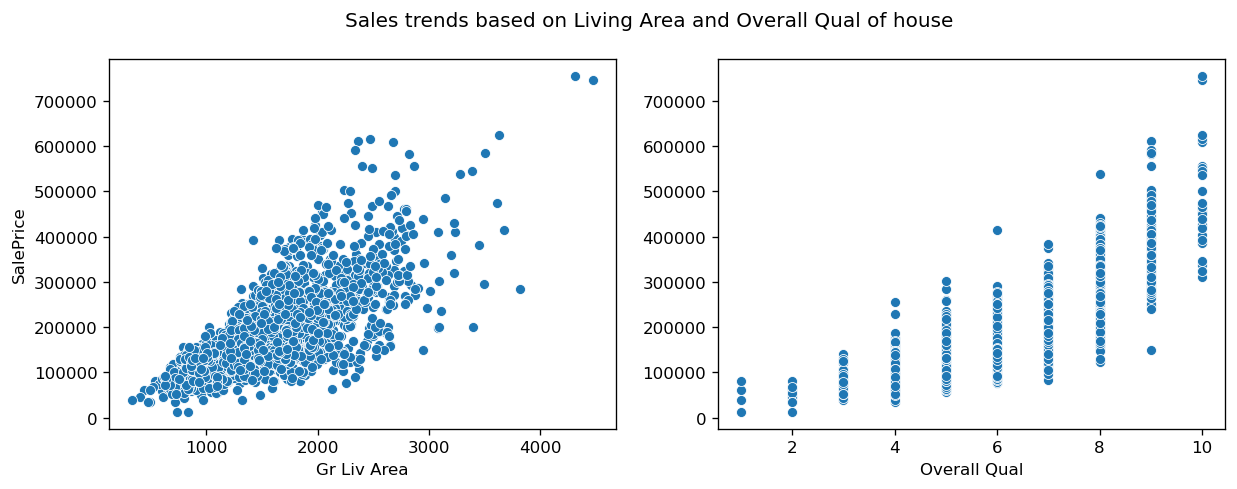

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2, dpi = 120, figsize = (12,4))
sns.scatterplot(y = Ames_data['SalePrice'], x = Ames_data['Gr Liv Area'], ax = ax1);
sns.scatterplot(y = 'SalePrice', x = 'Overall Qual', data = Ames_data, ax = ax2);
plt.ylabel("")
fig.subplots_adjust(wspace=0.2)
fig.suptitle('Sales trends based on Living Area and Overall Qual of house');

**Conclusion**
* The trend shown in above graph is clear now with genuine relationship/linearity that can be used further to train the model
* Moreover, we can still go through some more features (additionally) to check such trends, or calculate standard deviation/Z Score for our SalePrice column (can go more statistically) to shape this trend. Somehow, the current dataset is also suitable for further processes. There can be ways like percentage of dataset that can be avoided, or even visual understanding of data.

In [58]:
#Converting DataFrame to CSV and Saving as new file
Ames_data.to_csv("Ames_outliers_removed.csv", index = False)

OPTIONAL
* Comparison of SalePrice with other attributes as well.
* Including categorical features to understand the diversity of scatterplot

In [60]:
Ames_data[['SalePrice','Garage Cars']]

,SalePrice,Garage Cars
0,215000,2.0
1,105000,1.0
2,172000,1.0
3,244000,2.0
4,189900,2.0
...,...,...
2925,142500,2.0
2926,131000,2.0
2927,132000,0.0
2928,170000,2.0


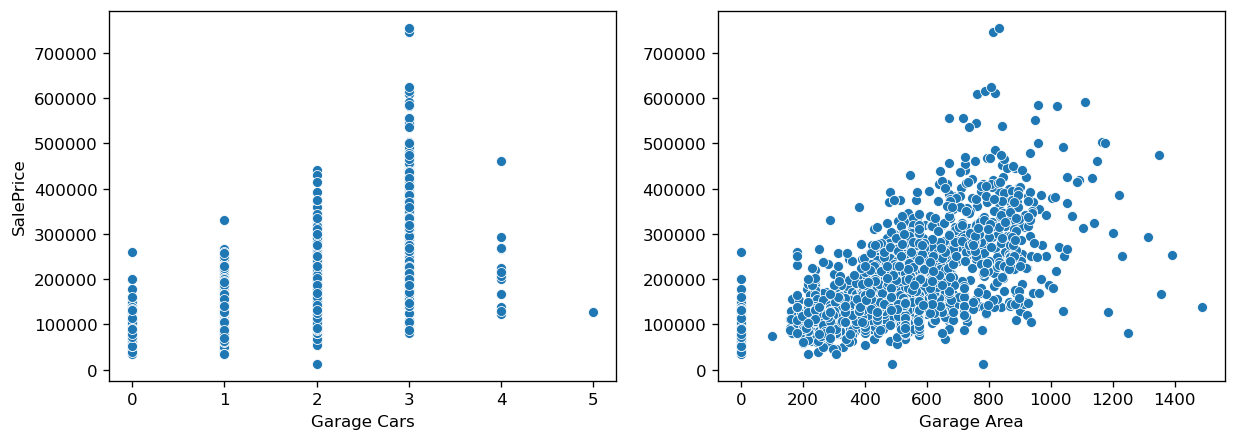

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2, dpi = 120, figsize = (12,4))
sns.scatterplot(y = Ames_data['SalePrice'], x = Ames_data['Garage Cars'], ax = ax1);
sns.scatterplot(y = 'SalePrice', x = 'Garage Area', data = Ames_data, ax = ax2);
plt.ylabel("")
fig.subplots_adjust(wspace=0.2)

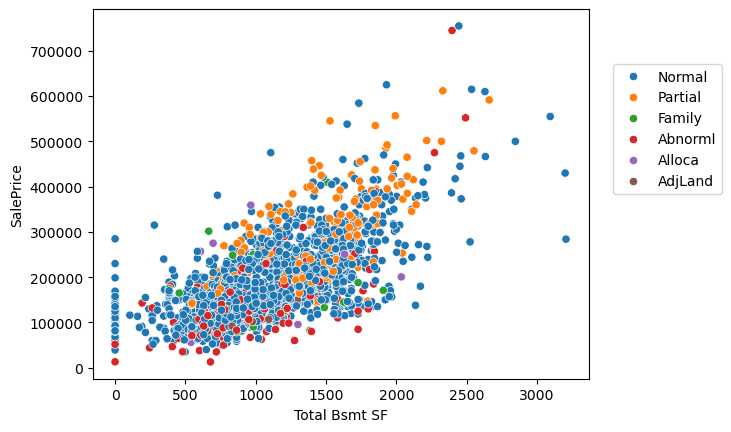

In [94]:
sns.scatterplot(x = Ames_data['Total Bsmt SF'], y =Ames_data['SalePrice'], hue = Ames_data['Sale Condition'])
plt.legend(loc = (1.05, 0.5));

**Observation**
* Most likely to see that people prefer having garage size of 3 cars
* Distribution of SalesCondition w.r.t SalePrice : Total Basement Area Ratio

**2.2** : Dealing with missing values

What are missing values? How it is represented in pandas dataframe?

Missing values, often represented as NaN (Not a Number) in pandas DataFrames, are gaps or empty entries within a dataset. They can arise from various sources:

* Data Collection Issues   
* Data entry errors
* Merging datasets with inconsistent formats

NaN: This is the most common representation for numerical data.

None: Often used for missing values in Python objects (strings, etc.)

There is no 100% correct way of dealing with missing values. Here are some reasonable approaches to take on this data.

1. Keep the Null values as it is
2. Replace it with some reasonable values
3. Remove rows/columns that have Null values

In [110]:
#checking null values in the dataframe
Ames_data.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

Since, PID is a column with unique id's that works similar to the indexing of rows. Therefore, we don't need the PID column for further processes.

In [117]:
Ames_data.drop('PID', axis = 1, inplace=True)

When we talk about taking a decision whether to drop the row/column with null values or not, we oftenly consider how much **percent** of data records is missing. 

In [151]:
#Defining custom function for percentage of feature's data missing
def percent_missing(df):
    percent_nan = (100 * df.isnull().sum()) / len(df)
    percent_nan = percent_nan[percent_nan > 0 ].sort_values() #Filtering columns that doesn't have missing value
    return percent_nan

In [153]:
#Calling the function over the dataframe
percent_nan = percent_missing(Ames_data)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

The above series gives us the list of features that contains missing values and percentage of how much data is missing w.r.t the total dataframe.
If we present missing one row in percentage then that would be equal as follows:

percent_value = 100 / len(Ames_data) = 100/2927 = **0.034**

If we see, top 7 features have the same percent value. That means there's only one row missing in these columns. Let's consider those rows along with some of the features that are less than 1%

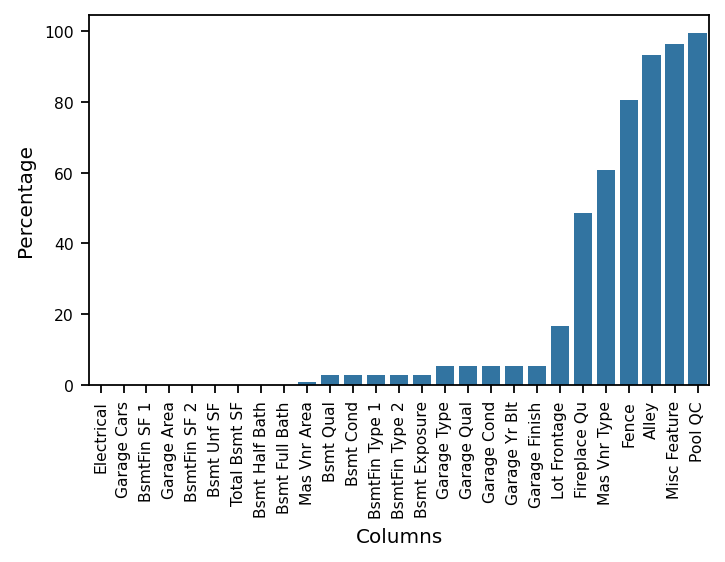

In [165]:
#Presenting the percentage through bar graph
plt.figure(figsize=(5,3), dpi = 160)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90, size = 7)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

There are some of the features that are less than one and remember about 0.034% ~ 1 row, let's work on those columns first

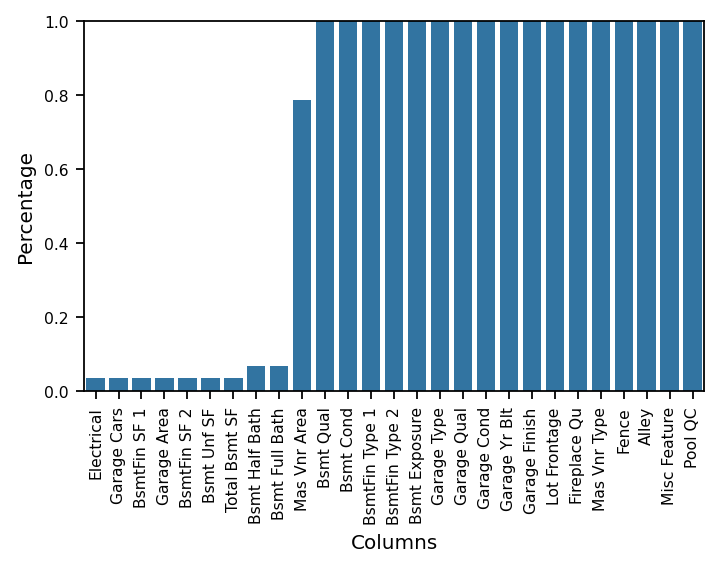

In [163]:
plt.figure(figsize=(5,3), dpi = 160)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90, size = 7)
plt.ylim(0,1)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performance? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

For example, a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. This decision is based off domain expertise and knowledge of the data set!

Based on the text description of the features, most of this missing data is actually NaN on purpose as a placeholder for 0 or "none"
Let's explore feature by feature to understand whether to remove the row or fill in values

In [219]:
#Listingfeatures that have less than 1% threshold (assuming, if I have to drop rows then it should be done under 1% of dataset)
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

Gathering the group of basement features within this condition:

BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Bsmt Half Bath, Bsmt Full Bath, Total Bsmt SF 

#### Filling data in basement columns
From description, it is clear that where there is no basement available 'NA' is marked for this condition. Since there is no basement, other categorical and numeric features will also contain the NULL values. Therefore, we can fill NULL values with 0 for numeric and 'None' string for categories for better understanding

In [227]:
Ames_data[Ames_data['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [229]:
Ames_data[Ames_data['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [233]:
#numeric columns for basement
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
Ames_data[bsmt_num_cols] = Ames_data[bsmt_num_cols].fillna(0)

In [237]:
#categorical columns for basement
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
Ames_data[bsmt_str_cols] = Ames_data[bsmt_str_cols].fillna('None')

In [239]:
#recalculating the percentage
percent_nan = percent_missing(Ames_data)

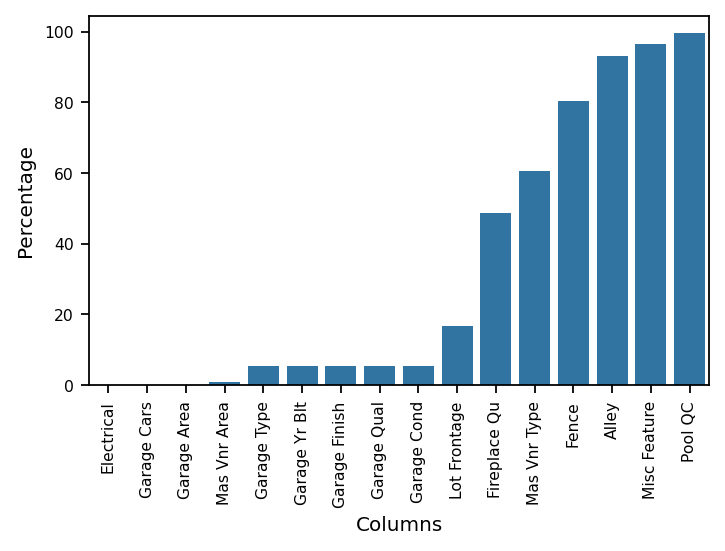

In [244]:
plt.figure(figsize=(5,3), dpi = 160)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90, size = 7)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

#No basement related feature left with NULL values

#### Dropping Rows
A few of these features appear that it is just one or two rows missing the data. We can take a chance of removing those rows

In [251]:
Ames_data.dropna(axis = 0, subset = ['Electrical', 'Garage Cars'], inplace = True)

In [253]:
percent_nan = percent_missing(Ames_data)
percent_nan[percent_nan < 1]

Mas Vnr Area    0.786325
dtype: float64

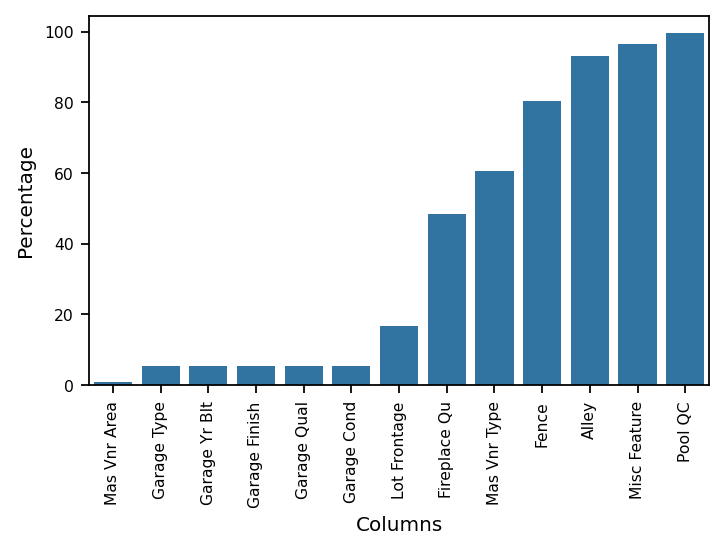

In [255]:
plt.figure(figsize=(5,3), dpi = 160)
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90, size = 7)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

**Mas Vnr Feature**

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [259]:
Ames_data['Mas Vnr Area'].isnull().sum()

23

In [261]:
Ames_data['Mas Vnr Type'].isnull().sum()

1773

In [265]:
Ames_data["Mas Vnr Type"] = Ames_data["Mas Vnr Type"].fillna("None")
Ames_data["Mas Vnr Area"] = Ames_data["Mas Vnr Area"].fillna(0)

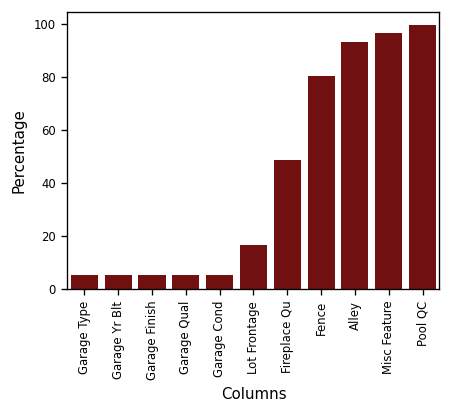

In [281]:
#Here we can see every column less than 1% being covered from null values
percent_nan = percent_missing(Ames_data)

plt.figure(figsize=(4,3), dpi = 120)
sns.barplot(x = percent_nan.index, y = percent_nan, color = 'maroon')
plt.xticks(rotation = 90, size = 7)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

#### Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

**Garage Columns**

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [287]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
Ames_data[gar_str_cols] = Ames_data[gar_str_cols].fillna('None')

*Garage Yr Blt Column*

A debatable thought might occur that this column includes years in the form of %yyyy and filling Null values with 0 can be or can't be somehow different from others. But for the time, we can use 0 as the filler and will keep this in mind for further in any analysis condition

In [293]:
Ames_data['Garage Yr Blt'] = Ames_data['Garage Yr Blt'].fillna(0)

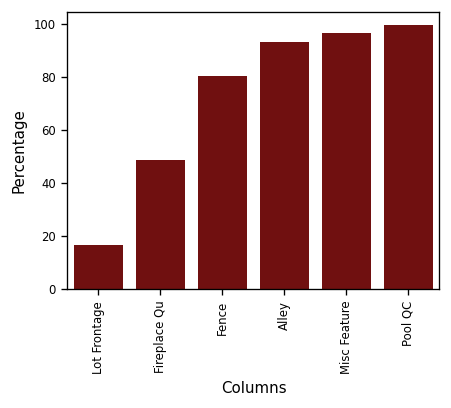

In [297]:
percent_nan = percent_missing(Ames_data)

plt.figure(figsize=(4,3), dpi = 120)
sns.barplot(x = percent_nan.index, y = percent_nan, color = 'maroon')
plt.xticks(rotation = 90, size = 7)
plt.xlabel('Columns', size = 9)
plt.ylabel('Percentage', size = 9)
plt.yticks(size = 7);

#Only 6 columns are left

#### Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. 

In [300]:
Ames_data[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2925,37.0,NaN,GdPrv,NaN,NaN,NaN
2926,NaN,NaN,MnPrv,NaN,NaN,NaN
2927,62.0,NaN,MnPrv,NaN,Shed,NaN
2928,77.0,TA,NaN,NaN,NaN,NaN


In [302]:
Ames_data.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1, inplace=True)

#### Filling in Fireplace Quality based on Description Text

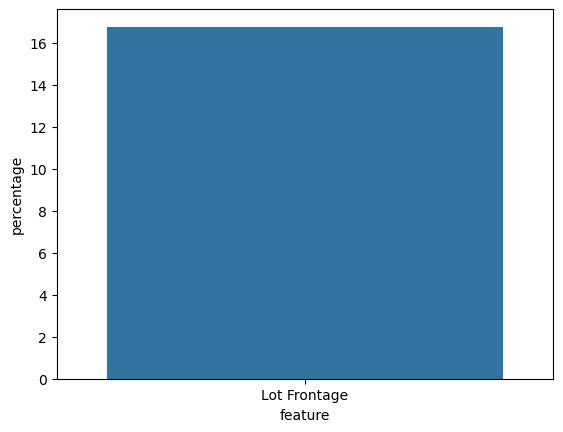

In [309]:
Ames_data['Fireplace Qu'] = Ames_data['Fireplace Qu'].fillna("None")
percent_nan = percent_missing(Ames_data)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xlabel("feature")
plt.ylabel("percentage");

Left with one features only - 'Lot Frontage'

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [315]:
#finding categories within neighborhood
Ames_data['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

let's check the expansion of these categories based on 'lot frontage' values

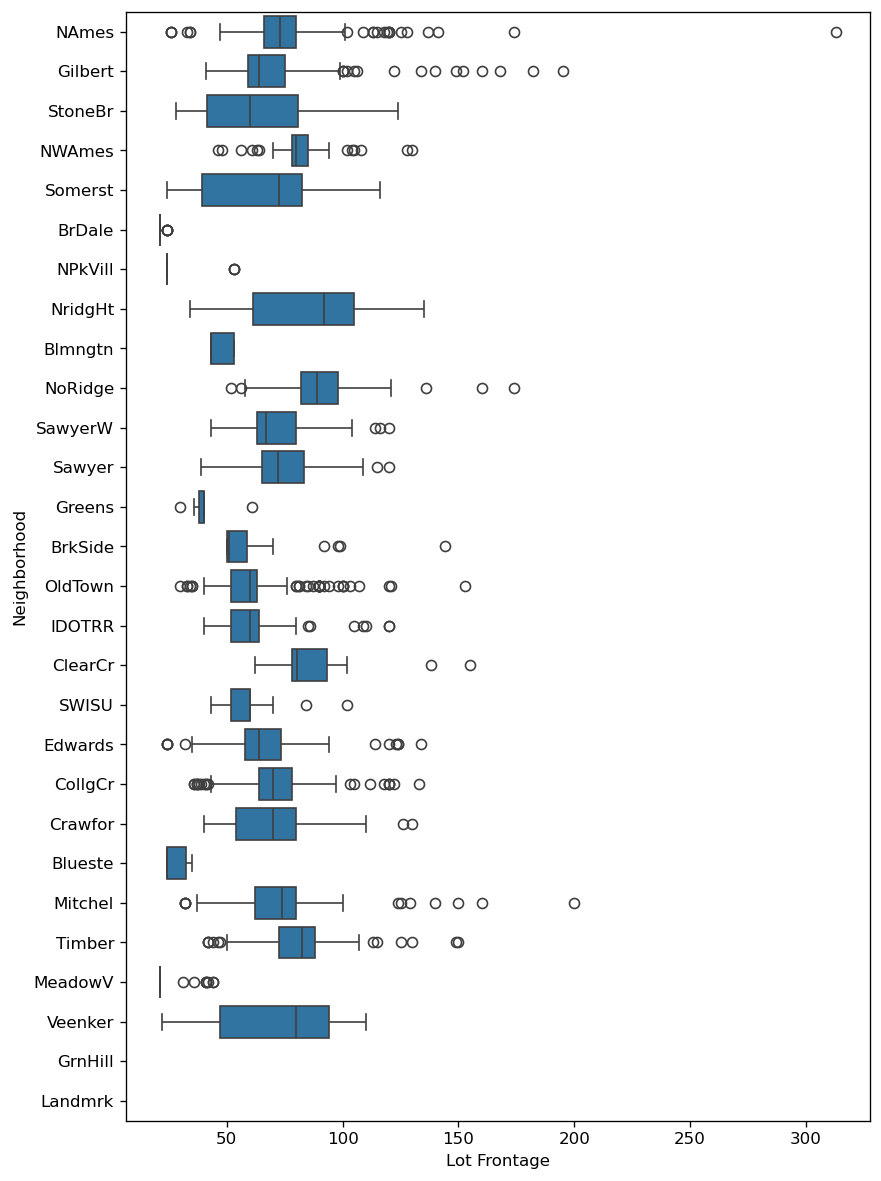

In [324]:
plt.figure(figsize=(8,12),dpi =120)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=Ames_data,orient='h');

We can check for average values of lot frontage across all groups. The average value can be a good candidate as a filler for null values

In [327]:
Ames_data.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [333]:
#first five data values
Ames_data.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [335]:
Ames_data[Ames_data['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [339]:
#finding out a range of values in between NaN values are present
Ames_data.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

#### Transform Column
Using the transform() function over 'Lot Frontage' feature, grouped by neighborhood categories

In [344]:
Ames_data.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [346]:
#Checking the null value range between row 21 to 25
Ames_data.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [350]:
#While the values seems to be accurate and suits the dataset, let's replace this with original dataframe
Ames_data['Lot Frontage'] = Ames_data.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

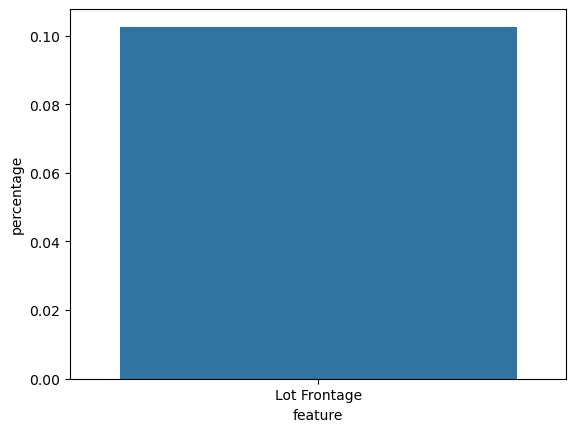

In [352]:
percent_nan = percent_missing(Ames_data)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xlabel("feature")
plt.ylabel("percentage");

Some of the null values is still there because we have certain neighborhood categories for which we doesn't have lot frontage value. Let's simply replace it with 0

In [357]:
Ames_data['Lot Frontage'] = Ames_data['Lot Frontage'].fillna(0)

In [361]:
percent_nan = percent_missing(Ames_data)
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! 
Saving the dataset as follows:

In [364]:
Ames_data.to_csv("Ames_No_Missing_Data.csv",index=False)

### STEP 3: FEATURE ENGINEERING
#### Dealing with Categorical Data
    
Many machine learning models can not deal with categorical data set as strings. For example, linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

#### Numerical Column to Categorical

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model. For example, the encoding MSSubClass is essentially just a number code per class:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES". Also, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. We have to make sure you fully understand your data set to examine what needs to be converted/changed.

In [409]:
# Convert to String
Ames_data['MS SubClass'] = Ames_data['MS SubClass'].apply(str)

In [415]:
# Diving our dataframe into numeric and categorical features

data_nums = Ames_data.select_dtypes(exclude='object')
data_objs = Ames_data.select_dtypes(include='object')

In [417]:
#numeric columns only
data_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath        29

In [419]:
#categorical columns only
data_objs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qual   

In [423]:
#converting categorical columns by creating 'dummies' and concatinating with numerical data
data_objs = pd.get_dummies(data_objs,drop_first=True)
final_df = pd.concat([data_nums,data_objs],axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


#### Final Thoughts

We don't know if 274 columns are very useful. More columns doesn't necessarily lead to better results. In fact, we may want to further remove columns (or later on use a model with regularization to choose important columns for us). What I have done here has greatly expanded the ratio of rows to columns, which may actually lead to worse performance (however you don't know until you've actually compared multiple models/approaches)

In [426]:
#let's check the new correlated features with SalePrice
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

    OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

Most likely a human realtor rated this "Overall Qual" column, which means it highly likely takes into account many of the other features. It also means that any future house we intend to predict a price for will need this "Overall Qual" feature, which implies that every new house on the market that will be priced with our ML model will still require a human person!

In [430]:
#saving final dataframe after getting preprocessed
final_df.to_csv('Ames_Final_DF.csv')

##### We will be using this final dataframe for the EDA and model training. This dataset is preprocessed/cleaned to be used further.

----

### Author
[Sourav Syal](https://www.linkedin.com/in/sourav-syal/)